### **LOAD THE IRIS DATA SET**

In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [2]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### **STANDARDIZE THE DATA**

PCA is affected by scale, so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the data set’s features onto unit scale (mean = 0 and variance = 1)

In [3]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

### **PCA PROJECTION TO 2D**

The original data has four columns (sepal length, sepal width, petal length and petal width). In this section, the code projects the original data, which is four-dimensional, into two dimensions. After dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [5]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [6]:
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


### **VISUALIZE 2D PROJECTION**

 Notice on the graph below that the classes seem well separated from each other.

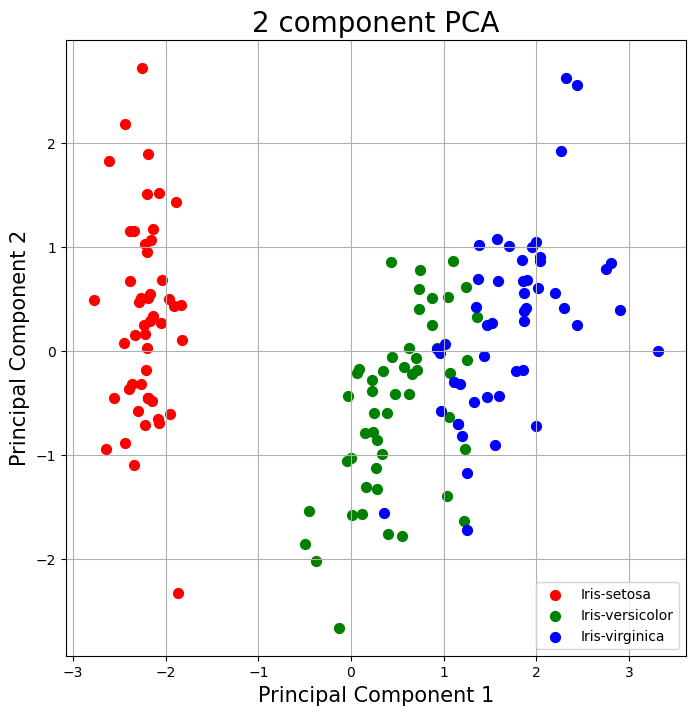

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### **EXPLAINED VARIANCE**

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important because while you can convert four-dimensional space to a two-dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77 percent of the variance, and the second principal component contains 23.03 percent of the variance. Together, the two components contain 95.80 percent of the information.

In [8]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

### **How to know total number of components?**

Notice the code below has .95 for the number of components parameter. It means that scikit-learn chooses the minimum number of principal components such that 95 percent of the variance is retained.

In [9]:
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)

In [10]:
pca.fit(x)

PCA(n_components=0.95)

In [11]:
pca.n_components_

2

### **OR We can use below code**

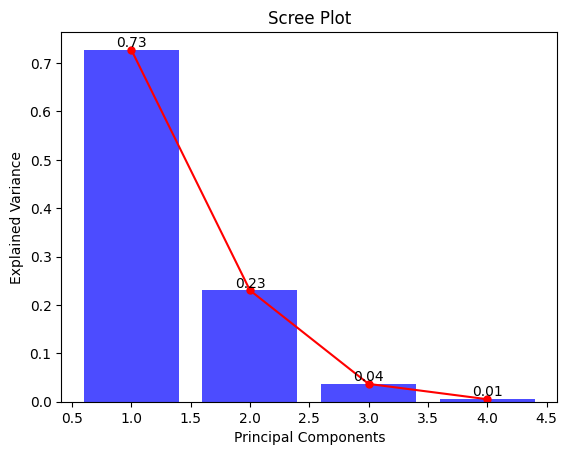

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load Iris dataset into Pandas DataFrame
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

# Extract features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Extract explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot scree plot with bar chart and line chart
fig, ax = plt.subplots()

# Bar chart
ax.bar(np.arange(1, len(explained_variance) + 1), explained_variance, color='blue', alpha=0.7)
ax.set_xlabel('Principal Components')
ax.set_ylabel('Explained Variance')
ax.set_title('Scree Plot')

# Line chart
ax.plot(np.arange(1, len(explained_variance) + 1), explained_variance, color='red', marker='o', markersize=5)

# Add data labels
for i, explained_var in enumerate(explained_variance):
    ax.text(i + 1, explained_var, f'{explained_var:.2f}', ha='center', va='bottom')

plt.show()
